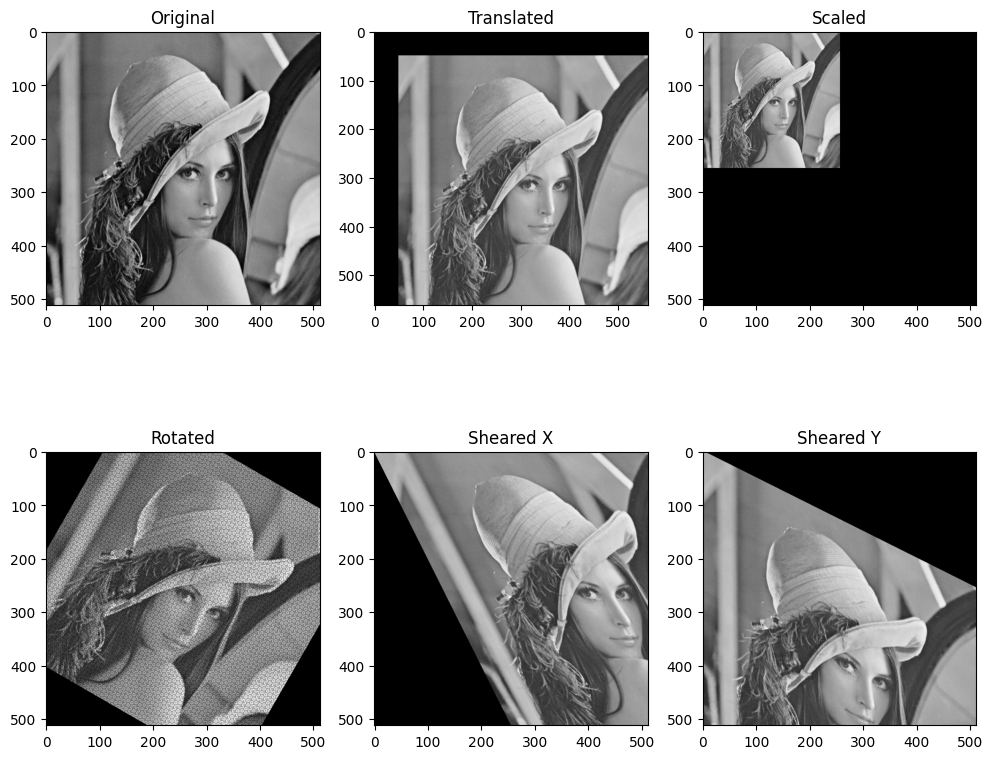

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('A:\image_processing_assignment\images\Lena.png', cv2.IMREAD_GRAYSCALE)

# Define image dimensions
rows, cols = img.shape

# (A) Translation
def translate(img, dx, dy):

    rows, cols = img.shape
    # Calculate new dimensions
    new_rows = rows + abs(dy)
    new_cols = cols + abs(dx)

    translated_img = np.zeros((new_rows, new_cols), dtype=img.dtype)
    for x in range(rows):
        for y in range(cols):
            new_x = x + dx
            new_y = y + dy
            if 0 <= new_x < cols+dx and 0 <= new_y < rows+dy:
                translated_img[new_x, new_y] = img[x, y]
    return translated_img

# (B) Scaling
def scale(img, scale_factor):
    scaled_rows, scaled_cols = int(img.shape[0] * scale_factor), int(img.shape[1] * scale_factor)
    scaled_img = np.zeros((512, 512), dtype=img.dtype)

    for y in range(scaled_rows):
        for x in range(scaled_cols):
            # Calculate coordinates in the original image
            src_x = x / scale_factor
            src_y = y / scale_factor

            # Find the four nearest pixels in the original image
            x1 = int(src_x)
            y1 = int(src_y)
            x2 = min(x1 + 1, img.shape[1] - 1)
            y2 = min(y1 + 1, img.shape[0] - 1)

            # Calculate fractional parts for interpolation
            dx = src_x - x1
            dy = src_y - y1

            # Perform bilinear interpolation
            interpolated_value = (1 - dx) * (1 - dy) * img[y1, x1] + \
                                  dx * (1 - dy) * img[y1, x2] + \
                                  (1 - dx) * dy * img[y2, x1] + \
                                  dx * dy * img[y2, x2]

            scaled_img[y, x] = interpolated_value
        

    return scaled_img


# (C) Rotation
def rotate(img, angle):
    rotated_img = np.zeros_like(img)
    angle_rad = np.deg2rad(angle)
    cos_theta = np.cos(angle_rad)
    sin_theta = np.sin(angle_rad)
    center_x = cols / 2
    center_y = rows / 2
    for y in range(rows):
        for x in range(cols):
            new_x = int((x - center_x) * cos_theta - (y - center_y) * sin_theta + center_x)
            new_y = int((x - center_x) * sin_theta + (y - center_y) * cos_theta + center_y)
            if 0 <= new_x < cols and 0 <= new_y < rows:
                rotated_img[new_y, new_x] = img[y, x]
    return rotated_img


 
def shear_x(img, shear_factor):
    sheared_img = np.zeros_like(img)
    for y in range(rows):
        for x in range(cols):
            new_x = x + shear_factor * y
            new_y = y
            if 0 <= new_x < cols and 0 <= new_y < rows:
                sheared_img[int(new_y), int(new_x)] = img[y, x]
    return sheared_img

# (E) Shearing in Y - direction
def shear_y(img, shear_factor):
    sheared_img = np.zeros_like(img)
    for y in range(rows):
        for x in range(cols):
            new_x = x
            new_y = y + shear_factor * x
            if 0 <= new_x < cols and 0 <= new_y < rows:
                sheared_img[int(new_y), int(new_x)] = img[y, x]
    return sheared_img


# Apply transformations
translated_img = translate(img, 50, 50)
scaled_img = scale(img, 0.5)
rotated_img = rotate(img, 30)

sheared_x_img = shear_x(img, 0.5)
sheared_y_img = shear_y(img, 0.5)

# Plot the images using Matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(2, 3, 2)
plt.imshow(translated_img, cmap='gray')
plt.title('Translated')

plt.subplot(2, 3, 3)
plt.imshow(scaled_img, cmap='gray')
plt.title('Scaled')

plt.subplot(2, 3, 4)
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated')

plt.subplot(2, 3, 5)
plt.imshow(sheared_x_img, cmap='gray')
plt.title('Sheared X')

plt.subplot(2, 3, 6)
plt.imshow(sheared_y_img, cmap='gray')
plt.title('Sheared Y')

plt.show()


512 512


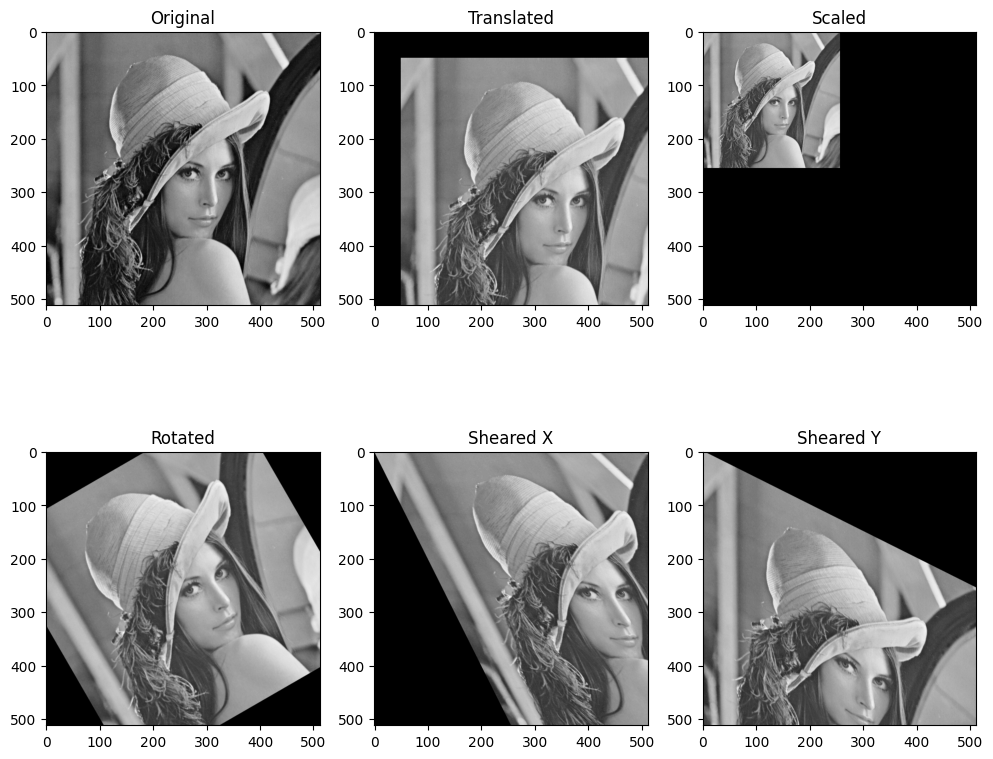

In [5]:
"A:\image_processing_assignment\images\Lena.png"

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread("A:\image_processing_assignment\images\Lena.png", cv2.IMREAD_GRAYSCALE)

# Define image dimensions
rows, cols = img.shape

print(rows, cols)

# Define transformation matrices
# (A) Translation
M_translation = np.float32([[1, 0, 50], [0, 1, 50]])  # Translate 50 pixels in both x and y directions

# (B) Scaling
M_scaling = np.float32([[0.5, 0, 0], [0, 0.5, 0]])  # Scale the image by 0.5 in both x and y directions

# (C) Rotation
angle = 30  # Rotation angle in degrees
M_rotation = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)  # Rotate around the center of the image

# (D) Shearing in X - direction
M_shear_x = np.float32([[1, 0.5, 0], [0, 1, 0]])  # Shear in x-direction with shear factor 0.5

# (E) Shearing in Y - direction
M_shear_y = np.float32([[1, 0, 0], [0.5, 1, 0]])  # Shear in y-direction with shear factor 0.5

# Apply transformations
translated_img = cv2.warpAffine(img, M_translation, (cols, rows))
scaled_img = cv2.warpAffine(img, M_scaling, (cols, rows))
rotated_img = cv2.warpAffine(img, M_rotation, (cols, rows))
sheared_x_img = cv2.warpAffine(img, M_shear_x, (cols, rows))
sheared_y_img = cv2.warpAffine(img, M_shear_y, (cols, rows))

# Plot the images using Matplotlib
plt.figure(figsize=(12, 10))

plt.subplot(2, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')

plt.subplot(2, 3, 2)
plt.imshow(translated_img, cmap='gray')
plt.title('Translated')

plt.subplot(2, 3, 3)
plt.imshow(scaled_img, cmap='gray')
plt.title('Scaled')

plt.subplot(2, 3, 4)
plt.imshow(rotated_img, cmap='gray')
plt.title('Rotated')

plt.subplot(2, 3, 5)
plt.imshow(sheared_x_img, cmap='gray')
plt.title('Sheared X')

plt.subplot(2, 3, 6)
plt.imshow(sheared_y_img, cmap='gray')
plt.title('Sheared Y')

plt.show()


